<a href="https://colab.research.google.com/github/XiadaniCue/Simulaci-n-1/blob/main/Estimaci%C3%B3n_del_N%C3%BAmero_pi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estimación del número $π$

**Analíticamente**

**Experimento:**  Generar $U_1,U_2 \sim (0,1)$
Éxito: $U_2 ≤ \sqrt{1-U_2}$

Hacerlo n veces

**Nuestro estimador:** $\pi = \frac{4n}{N}$

**Consideramos la variable**
$$x_i= \Biggl\{\begin{array}{c}1~si~el~dardo~cae~dentro~del~punto~(p) \\ 0~~~si~cae~fuera~(1-p) \end{array}$$

Ahora consideramos
$$z= 4 \frac{x_1+x_2+...+x_N}{N}$$

Y calculamos el Valor Esperado:
$$E(z)= \frac{4}{N} E[x_i] +...+ E[x_N]$$
Calculamos
$$E[x_i]= (1(p)+0(1-p) =p$$
Entonces:
$$E(z)= \frac{4}{N} Np $$
$$E(z)=4p$$


Calculamos la Varianza:
$$V[z_n] = \frac{16}{N^2}(V[x_1] + \cdots + V[x_n])$$
Calculamos:
$$V[x_i] = E[x_i ^2] - E[x_i]^2 \\ = (1^2 \cdot p + 0^2 \cdot( 1 - p )) - p^2 \\ p-p^2=p(1-p)$$
$$\\\ V[z_n] = \frac{16}{N^2} \cdot Np(1-p) \\ { V[z_n] = \frac{ 16p(1-p)}{N} }$$

---
Ahora podemos usar la desigualdad de Chebyshev:
$$ P(|Z_n - E[z_n] | \geq \epsilon) \leq \frac{V[z_n]}{\epsilon ^2}  \\ {P(|Z_n - π | \geq \epsilon) \leq \frac{16p(1-p)}{N \epsilon ^2} } $$



Luego, dando un valor de $\epsilon$ podemos calcular el valor de N.

**Ejemplo:**

¿Cuántas dardos hay que lanzar para que la probabilidad de cometer un error mayor o igual que 0.1 sea menor que 0.01?

*Conocemos p (supongamos que sabemos que $p = \pi$)*

**$\epsilon$ es el error o la desviación estándar**

Sol:
$$\epsilon = 0.1 \\ P(|z_n - \pi| \geq \epsilon ) = 0.01 \\ \Longrightarrow N = \frac{16 p(1-p)}{ P(|z_n - \pi| \geq \epsilon } \cdot \epsilon ^2 = \frac{16 \frac{\pi}{4} (1 - \frac{\pi}{4}) }{0.01 (0.1)^2 } \\ N \approx 26,000$$

**Sin conocer P**

Si no conocemos p, analizamos.

Sabemos que $0≤ p≤ 1$

Gradicamente, podemos analizar que
$$p(1-p) ≤ \frac{1}{4}$$

Volvemos a calcular
$$N≤ \frac{ 16 \biggl( \frac{1}{4} \biggl)}{(0.01)(0.1)^2}$$
$$N≤40,000$$





**Por simulación**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

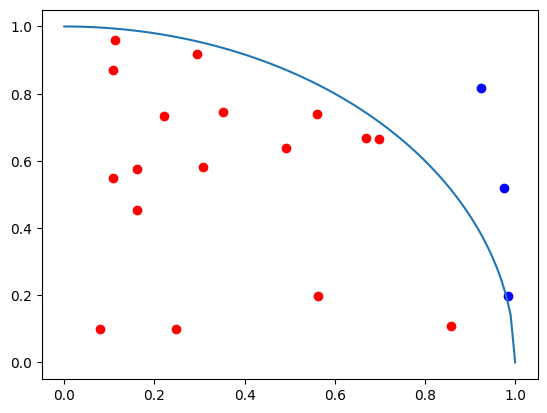

In [2]:
x=np.linspace(0,1,100)
plt.plot(x,np.sqrt(1-x**2))
for i in range(20):
  u1=rnd.random()
  u2=rnd.random()
  if u2<=np.sqrt(1-u1**2):
    plt.scatter(u1,u2, color="red")
  else:
    plt.scatter(u1, u2, color="blue")
plt.show()

In [3]:
def proba(N):
  lista=[]
  exitos=0
  for k in range(N):
    u1=rnd.random()
    u2=rnd.random()
    if u2<=np.sqrt(1-u1**2):
      exitos=exitos+1
    prob=exitos/(k+1)
    lista.append(4*prob)
  return lista

In [4]:
m=proba(1000)

In [5]:
#Calculamos la media
media= np.mean(m)

In [6]:
#calulamos la Varianza
vari=np.var(m)

In [7]:
#Calculamos la desviación estándar
desv=np.std(m)

In [8]:
a=media+desv
b=media-desv

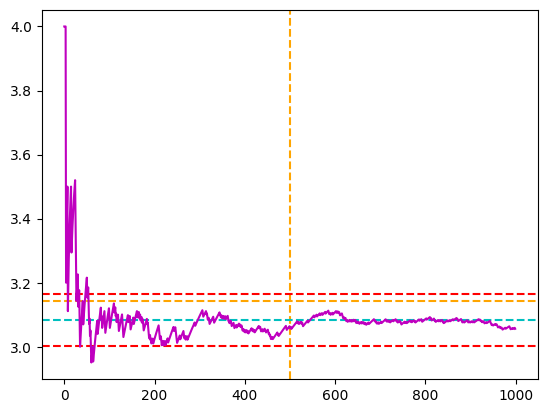

In [17]:
plt.axhline(3.1416, color="orange", linestyle="--")
plt.axvline(x=500, ymin=0, ymax=2, linestyle="--", color="orange")
plt.axhline(a, color="red", linestyle="--")
plt.axhline(b, color="red", linestyle="--")
plt.axhline(media, color="c", linestyle="--")
plt.plot(m, color="m")
plt.show()

In [10]:
#Se ve una muestra considerable de tamaño N≈500 donde da un resultado aceptable

In [11]:
#Para modificar la función y convertirla en una corrida de simulación
#Solo nos muestra la probabilidad
def simulacion(N):
  lista=[]
  exitos=0
  for k in range(N):
    u1=rnd.random()
    u2=rnd.random()
    if u2<=np.sqrt(1-u1**2):
      exitos=exitos+1
    prob=exitos/(k+1)
    lista.append(4*prob)
  return prob

#Con ayuda de nuestra gráfica podemos fijar el valor se N=500

In [12]:
def sim(n):
  L=[]
  for i in range(n):
    R=simulacion(500)
    L.append(R)
  return L

In [13]:
M=sim(10000)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   4.,   0.,
          0.,   0.,   0.,   0.,   0.,   9.,   0.,   0.,   0.,   0.,   0.,
          0.,   9.,   0.,   0.,   0.,   0.,   0.,   0.,   9.,   0.,   0.,
          0.,   0.,   0.,   0.,  12.,   0.,   0.,   0.,   0.,   0.,   0.,
         12.,   0.,   0.,   0.,   0.,   0.,   0.,  13.,   0.,   0.,   0.,
          0.,   0.,   0.,  28.,   0.,   0.,   0.,   0.,   0.,   0.,  32.,
          0.,   0.,   0.,   0.,   0.,   0.,  39.,   0.,   0.,   0.,   0.,
          0.,   0.,  43.,   0.,   0.,   0.,   0.,   0.,   0.,  53.,   0.,
          0.,   0.,   0.,   0.,   0.,  82.,   0.,   0.,   0.,   0.,   0.,
          0.,  76.,   0.,   0.,   0.,   0.,   0.,   0., 101.,   0.,   0.,
          0.,   0.,   0.,   0., 112., 

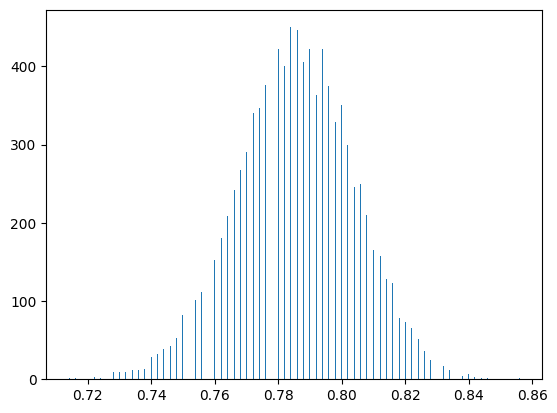

In [14]:
plt.hist(M, bins=500)

In [15]:
#¿Qué tipo de distribución es?
#Podríamos decir que es una distibución Normal